In [1]:
import trf_matrix as trf
import numpy as np
import os
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("default")
plt.rc("text", usetex=True)
plt.rc('font', family='serif', size=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=17)

In [3]:
def linfunc(x, a, b):
    return a * x + b

# Reflectance

## Fixed $n_f$

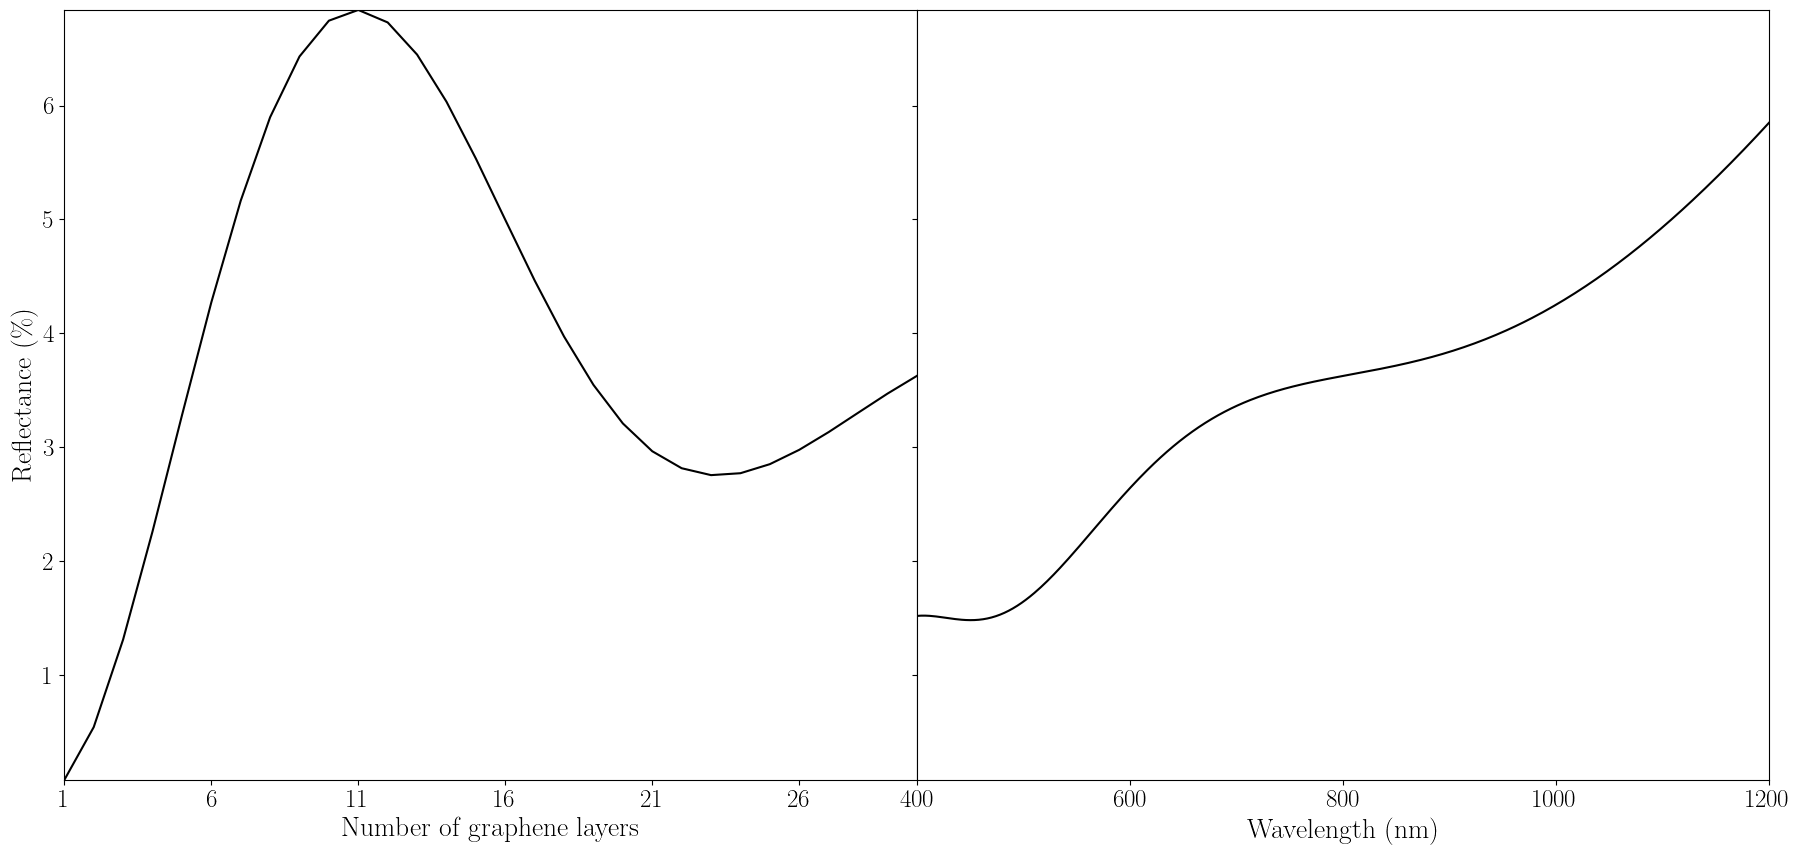

In [4]:
n_layers = 30
n_out = 1.4
wl = 800
d = 10.0

fig, axs = plt.subplots(1, 2, sharex=False, sharey=True, gridspec_kw={'hspace':0.0, 'wspace':0.00},
                             figsize=(22, 10))


os.chdir("/home/rmp/Projects/TransferMatrix/Nlayers")
data = np.loadtxt("N{}:ni1.46:np1.60:nf{:.2f}:d10.00:wl{}.dat".format(n_layers, n_out, wl), delimiter="\t")
x, y = data[:, 0], 100*data[:, 1]
axs[0].plot(x, y, color="black")
axs[0].set_xlabel("Number of graphene layers", fontsize=20)
axs[0].set_ylabel("Reflectance (\%)", fontsize=20)
axs[0].set_xticks(ticks=np.arange(1, 30, 5))
axs[0].margins(0)

os.chdir("/home/rmp/Projects/TransferMatrix/Reflectance")
data = np.loadtxt("N{}:ni1.46:np1.60:nf{:.2f}:d10:wl[400,1200].dat".format(n_layers, n_out, d), delimiter="\t")
x, y = data[:, 0], 100*data[:, 1]
axs[1].plot(x, y, color="black")
axs[1].set_xlabel("Wavelength (nm)", fontsize=20)
axs[1].set_xticks(ticks=np.arange(400, 1400, 200))
axs[1].margins(0)

os.chdir("/home/rmp/Projects/TransferMatrix/PLOTS")
#plt.savefig("Reflectance-1.pdf", dpi=800, bbox_inches="tight")

## Multiple $n_f$

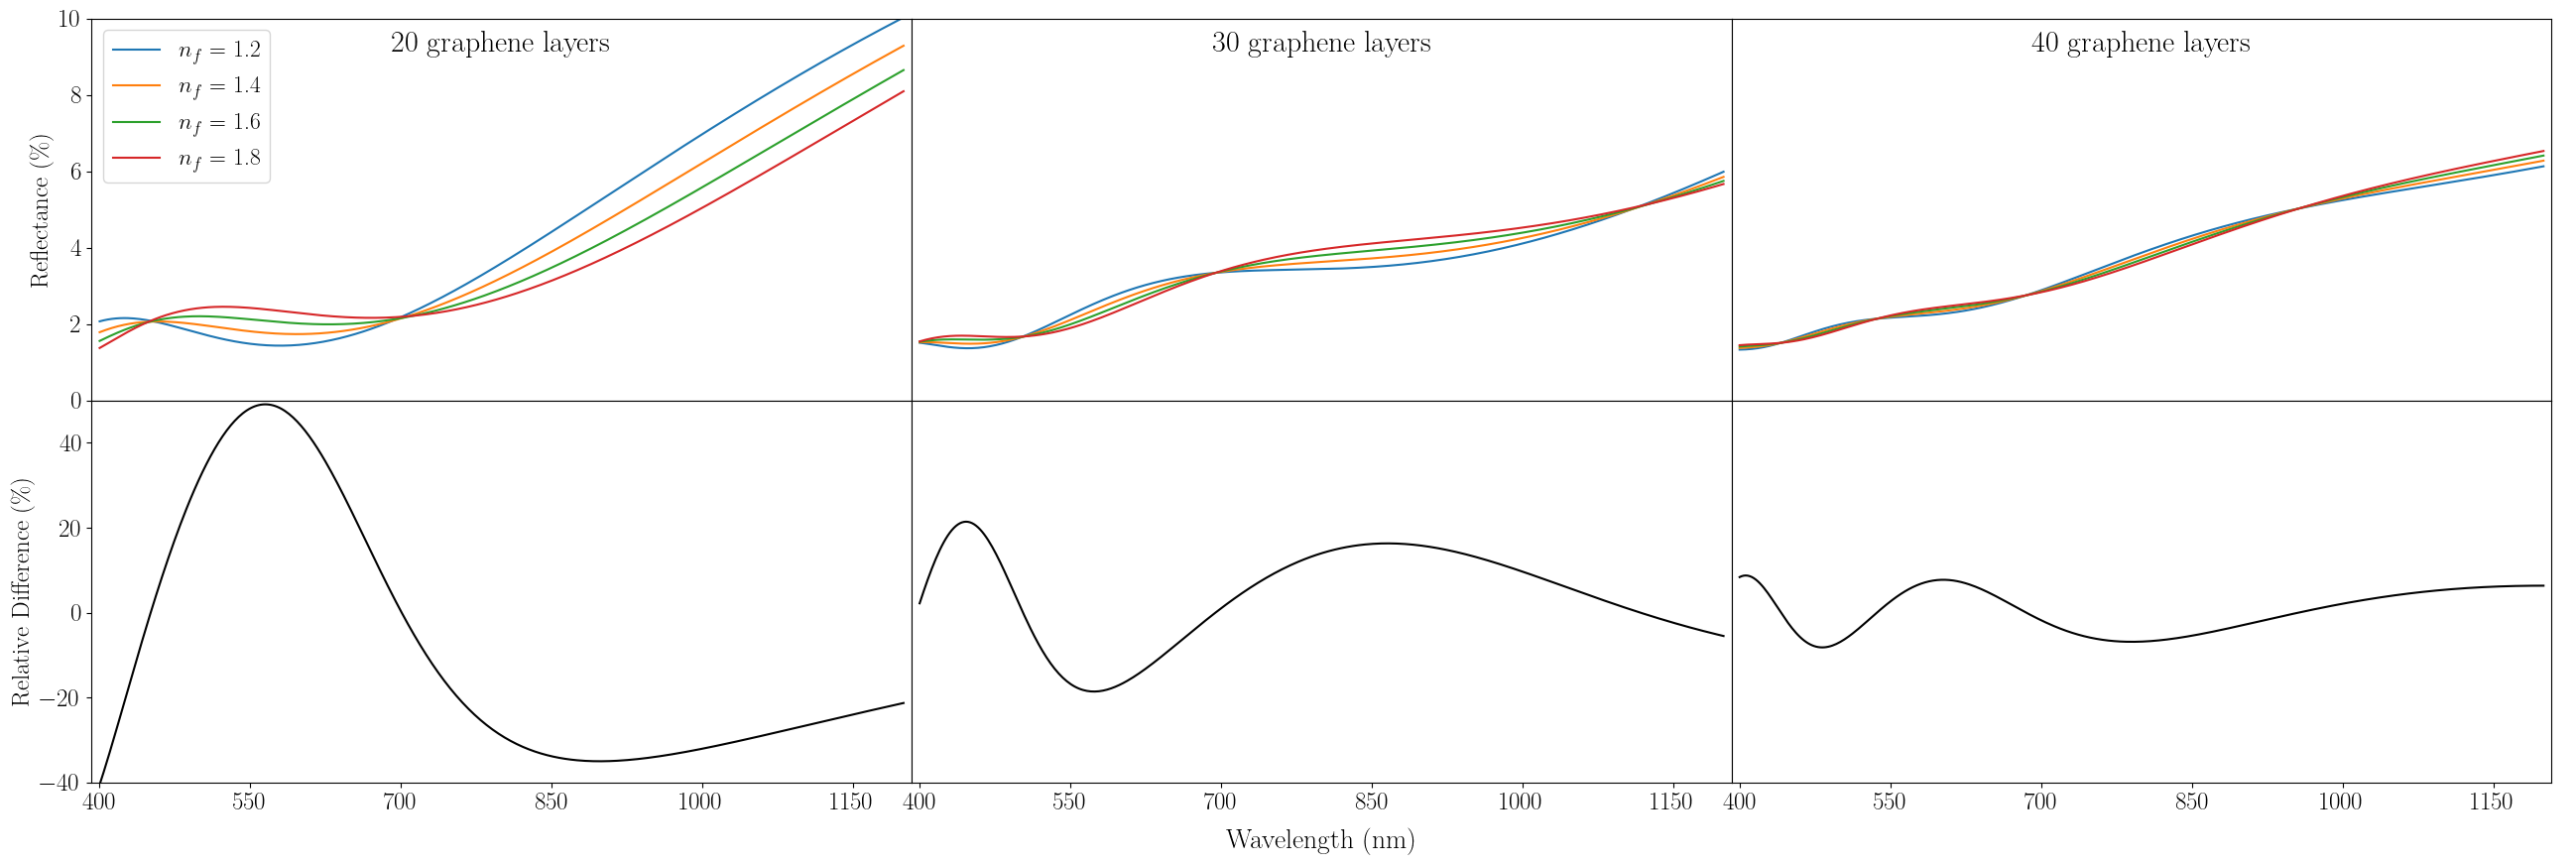

In [5]:
n_layers = 30
n_out_list = [1.2, 1.4, 1.6, 1.8]
n_layers_list = [20, 30, 40]

fig, axs = plt.subplots(2, 3, sharex=True, sharey=False, gridspec_kw={'hspace':0.0, 'wspace':0.00},
                             figsize=(32, 10))

os.chdir("/home/rmp/Projects/TransferMatrix/Reflectance")
for i in range(3):
    for n_out in n_out_list:
        n_layers = n_layers_list[i%3]
        data = np.loadtxt("N{}:ni1.46:np1.60:nf{:.2f}:d10:wl[400,1200].dat".format(n_layers, n_out),
                          delimiter="\t")
        x, y = data[:, 0], data[:, 1]*100
        axs[i//3, i%3].plot(x, y, label=r"$n_f$ = {}".format(n_out))
        if i == 0:
            axs[i//3, i%3].legend()
    axs[i//3, i%3].margins(.01)
    if i % 3 != 0:
        axs[i//3, i%3].set_yticks(ticks=[])
    axs[i//3, i%3].set_ylim(0, 10)
    axs[i//3, i%3].set_xticks(ticks=np.arange(400, 1200, 300))
    if i == 0:
        axs[i//3, i%3].set_ylabel("Reflectance (\%)")
    axs[i//3, i%3].set_title("{} graphene layers".format(n_layers), pad=-24)
    
for i in range(3, 6):
    n_layers = n_layers_list[i%3]
    n_out1, n_out2 = n_out_list[0], n_out_list[-1]
    data1 = np.loadtxt("N{}:ni1.46:np1.60:nf{:.2f}:d10:wl[400,1200].dat".format(n_layers, n_out1),
                          delimiter="\t")
    data2 = np.loadtxt("N{}:ni1.46:np1.60:nf{:.2f}:d10:wl[400,1200].dat".format(n_layers, n_out2),
                          delimiter="\t")
    x1, y1 = data1[:, 0], data1[:, 1]*100
    x2, y2 = data2[:, 0], data2[:, 1]*100
    rel = 2 * (y2 - y1) / (y1 + y2) * 100
    axs[i//3, i%3].plot(x, rel, color="black")
    axs[i//3, i%3].margins(.01)
    if i % 3 != 0:
        axs[i//3, i%3].set_yticks(ticks=[])
    axs[i//3, i%3].set_ylim(-40, 50)
    axs[i//3, i%3].set_xticks(ticks=np.arange(400, 1200, 150))
    if i == 3:
        axs[i//3, i%3].set_ylabel("Relative Difference (\%)")

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", top=False, bottom=False, left=False, right=False)
plt.xlabel(r"Wavelength (nm)", labelpad=10, fontsize=20)
#plt.ylabel("Reflectance (\%)", labelpad=10, fontsize=20)
os.chdir("/home/rmp/Projects/TransferMatrix/PLOTS")
#plt.savefig("Reflectance-2.pdf", dpi=800, bbox_inches="tight")
plt.show()

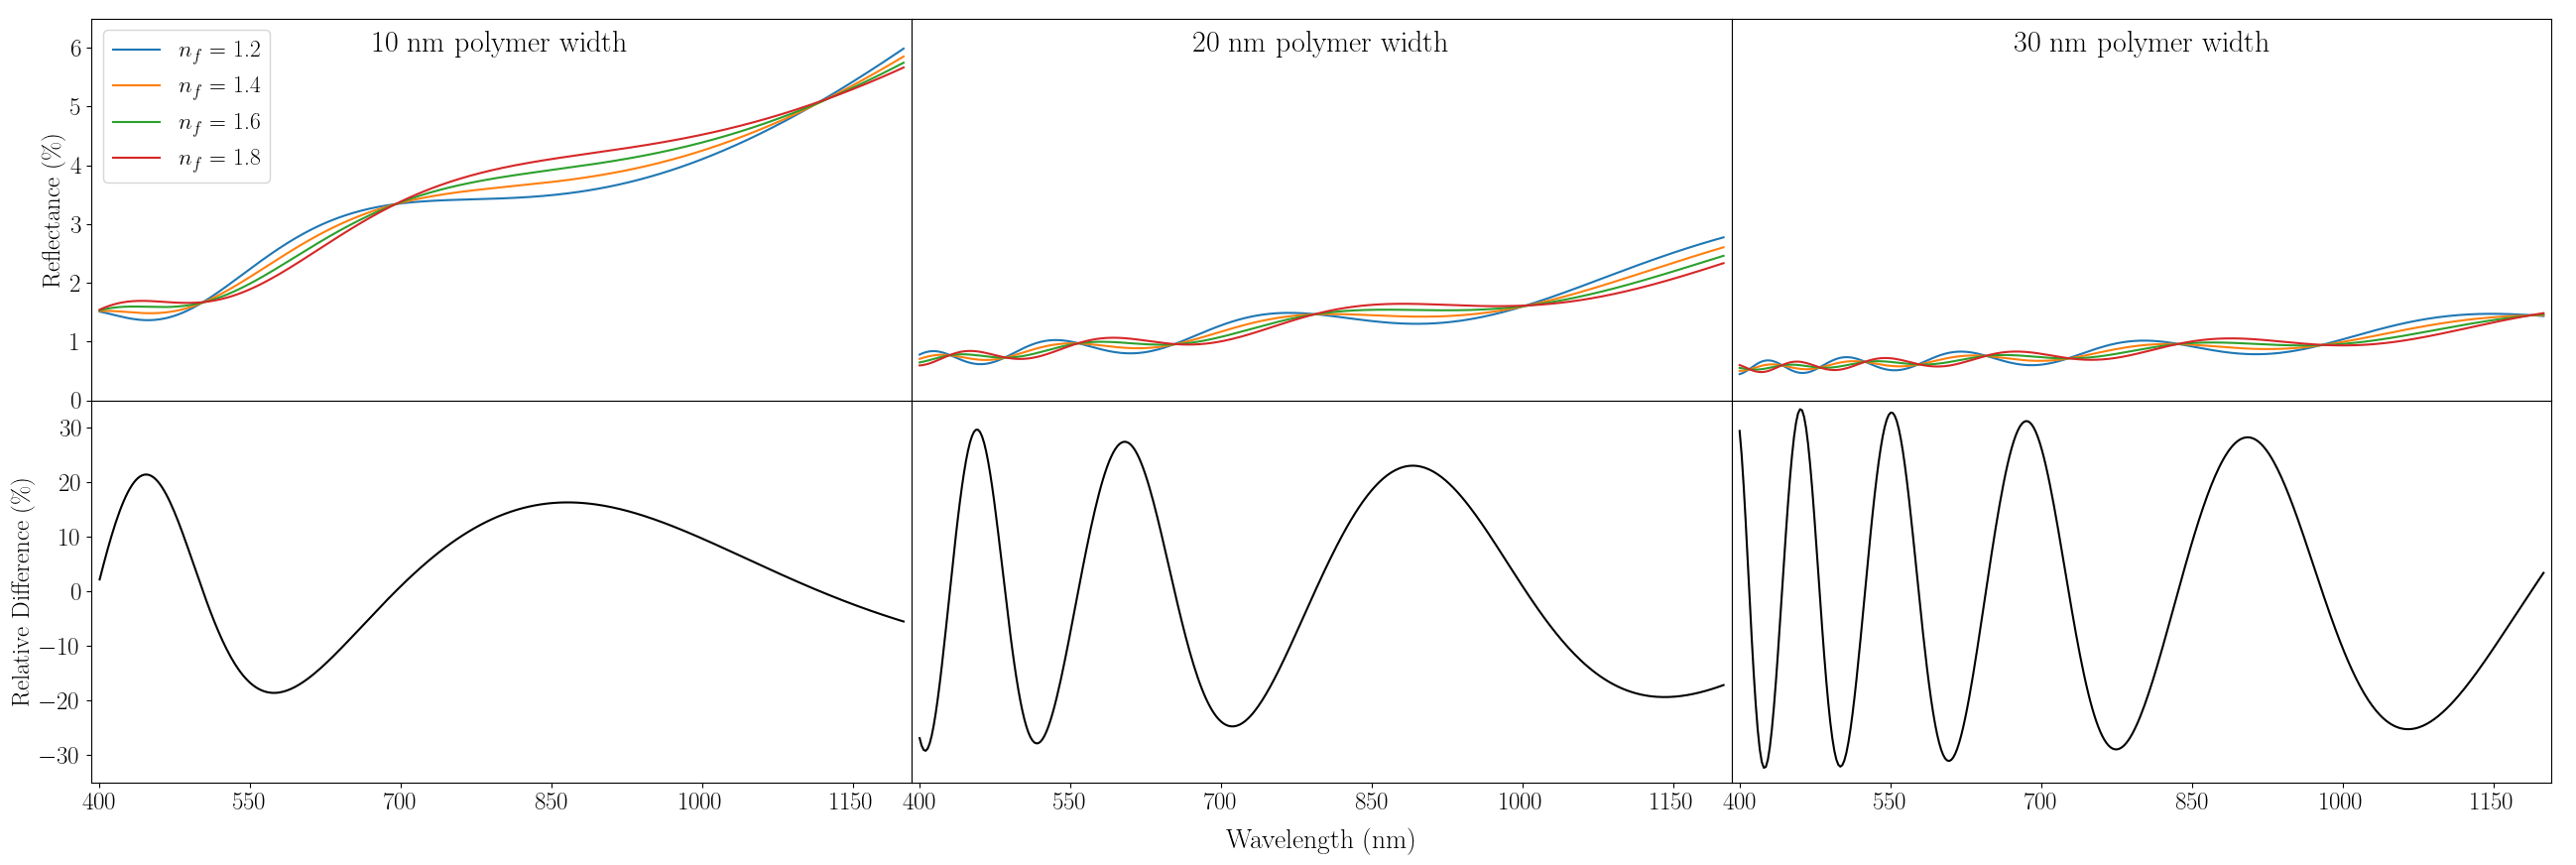

In [6]:
n_layers = 30
n_out_list = [1.2, 1.4, 1.6, 1.8]
n_layers_list = [20, 30, 40]
ds = [10, 20, 30]

fig, axs = plt.subplots(2, 3, sharex=True, sharey=False, gridspec_kw={'hspace':0.0, 'wspace':0.00},
                             figsize=(32, 10))

os.chdir("/home/rmp/Projects/TransferMatrix/Reflectance")
for i in range(3):
    for n_out in n_out_list:
        d = ds[i%3]
        data = np.loadtxt("N{}:ni1.46:np1.60:nf{:.2f}:d{}:wl[400,1200].dat".format(n_layers, n_out, d),
                          delimiter="\t")
        x, y = data[:, 0], data[:, 1]*100
        axs[i//3, i%3].plot(x, y, label=r"$n_f$ = {}".format(n_out))
        if i == 0:
            axs[i//3, i%3].legend()
    axs[i//3, i%3].margins(.01)
    if i % 3 != 0:
        axs[i//3, i%3].set_yticks(ticks=[])
    axs[i//3, i%3].set_ylim(0, 6.5)
    axs[i//3, i%3].set_xticks(ticks=np.arange(400, 1200, 300))
    if i == 0:
        axs[i//3, i%3].set_ylabel("Reflectance (\%)")
    axs[i//3, i%3].set_title("{} nm polymer width ".format(d), pad=-24)
    
for i in range(3, 6):
    d = ds[i%3]
    n_out1, n_out2 = n_out_list[0], n_out_list[-1]
    data1 = np.loadtxt("N{}:ni1.46:np1.60:nf{:.2f}:d{}:wl[400,1200].dat".format(n_layers, n_out1, d),
                          delimiter="\t")
    data2 = np.loadtxt("N{}:ni1.46:np1.60:nf{:.2f}:d{}:wl[400,1200].dat".format(n_layers, n_out2, d),
                          delimiter="\t")
    x1, y1 = data1[:, 0], data1[:, 1]*100
    x2, y2 = data2[:, 0], data2[:, 1]*100
    rel = 2 * (y2 - y1) / (y1 + y2) * 100
    axs[i//3, i%3].plot(x, rel, color="black")
    axs[i//3, i%3].margins(.01)
    if i % 3 != 0:
        axs[i//3, i%3].set_yticks(ticks=[])
    axs[i//3, i%3].set_ylim(-35, 35)
    axs[i//3, i%3].set_xticks(ticks=np.arange(400, 1200, 150))
    if i == 3:
        axs[i//3, i%3].set_ylabel("Relative Difference (\%)")

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", top=False, bottom=False, left=False, right=False)
plt.xlabel(r"Wavelength (nm)", labelpad=10, fontsize=20)
#plt.ylabel("Reflectance (\%)", labelpad=10, fontsize=20)
os.chdir("/home/rmp/Projects/TransferMatrix/PLOTS")
#plt.savefig("Reflectance-3.pdf", dpi=800, bbox_inches="tight")
plt.show()

# Field Plots

##  30 layers

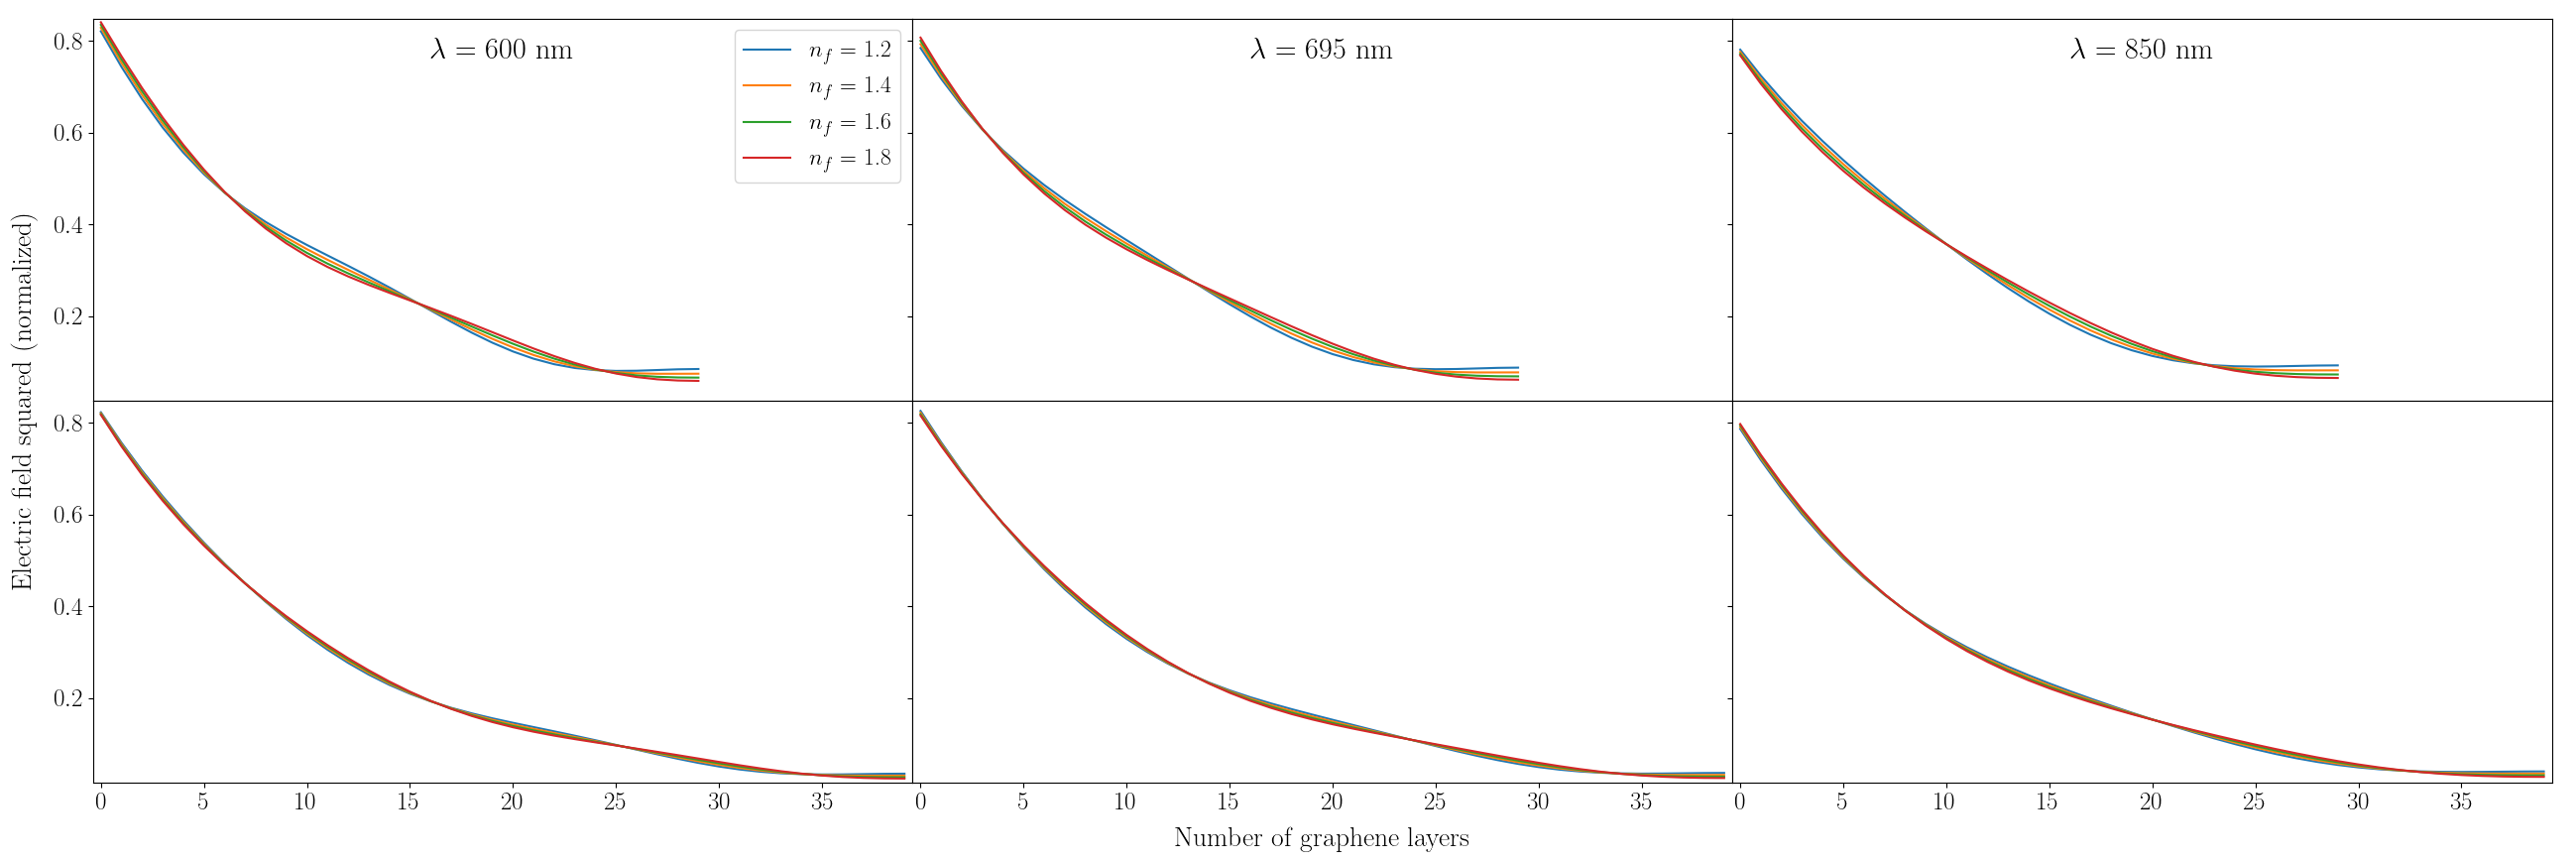

In [7]:
os.chdir("/home/rmp/Projects/TransferMatrix/Field")

n_layers_list = [30, 40]
n_out_list = [1.2, 1.4, 1.6, 1.8]
wls1 = [600, 695, 850]
wls2 = [600, 680, 850]
ss = [-1, 0, 1]

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, gridspec_kw={'hspace':0.0, 'wspace':0.00},
                             figsize=(32, 10))

for i in range(6):
    if i < 3:
        wl = wls1[i%3]
    else:
        wl = wls2[i%3]
    s = ss[i%3]
    n_layers = n_layers_list[i//3]
    for n_out in n_out_list:
        data = np.loadtxt("N{}:ni1.46:np1.6:nf{}:wl{}:s{}.dat".format(n_layers, n_out, wl, s), delimiter="\t")
        x, y = data[:, 0], data[:, 1]
        axs[i//3, i%3].plot(x, y, label=r"$n_f$ = {}".format(n_out))
    if i < 3:
        axs[i//3, i%3].set_title(r"$\lambda$ = {} nm".format(wl), pad=-30)
    if i == 0:
        axs[i//3, i%3].legend()
    axs[i//3, i%3].margins(0.01)
    
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", top=False, bottom=False, left=False, right=False)
plt.xlabel(r"Number of graphene layers", labelpad=10, fontsize=20)
plt.ylabel("Electric field squared (normalized)", labelpad=12, fontsize=20)
os.chdir("/home/rmp/Projects/TransferMatrix/PLOTS")
#plt.savefig("Field.pdf", dpi=800, bbox_inches="tight")
plt.show()

# Foci Plots

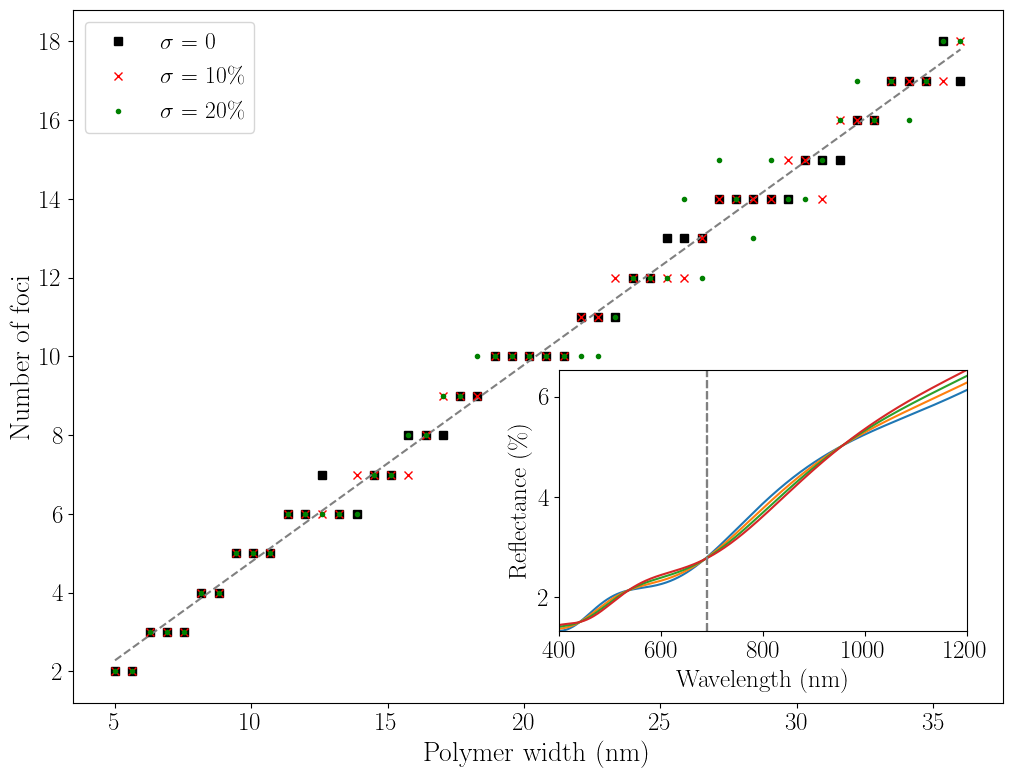

In [8]:
os.chdir("/home/rmp/Projects/TransferMatrix/Foci")

n_layers_list = [20, 25, 30, 35, 40, 45]
n_in_list = [1.46, 1.77]
ws = [0, .1, .2]
n_in = 1.46
n_layers = 30

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, gridspec_kw={'hspace':0.0, 'wspace':0.00}, figsize=(12, 9))
symbs = ("s", "x", ".")
colors = ("black", "red", "green")
for w, symb, color in zip(ws, symbs, colors):
    data = np.loadtxt("N{}:w{}:ni{}:np1.6:wl[300,1400].dat".format(n_layers, w, n_in), delimiter="\t")
    x, y = data[:, 0], data[:, 1]
    if w == 0:
        popt, pcov = opt.curve_fit(linfunc, x, y)
        axs.plot(x, y, symb, color=color, label=r"$\sigma$ = {}%".format(w))
        axs.plot(x, linfunc(x, popt[0], popt[1]), linestyle="--", color="0.5")
    else:
        axs.plot(x, y, symb, color=color, label=r"$\sigma$ = {}\%".format(int(w*100)))

    
os.chdir("/home/rmp/Projects/TransferMatrix/Reflectance")
n_out_list = [1.2, 1.4, 1.6, 1.8]
inaxs = fig.add_axes([0.53, 0.19, 0.34, 0.29])
for n_out in n_out_list:
    data = np.loadtxt("N40:ni1.46:np1.60:nf{:.2f}:d10:wl[400,1200].dat".format(n_out), delimiter="\t")
    x, y = data[:, 0], data[:, 1]*100
    xmin, xmax = 650, 750
    inaxs.plot(x, y)
    inaxs.axvline(x = 690, linestyle="--", color="0.5")
    inaxs.margins(0)
    inaxs.set_xlabel("Wavelength (nm)")
    inaxs.set_ylabel("Reflectance (\%)")
    
axs.legend()
#axs.set_yticks(ticks=np.arange(0, np.max(y) +1, 1))
#axs.set_xticks(ticks=np.arange())
axs.set_xlabel("Polymer width (nm)", fontsize=20)
axs.set_ylabel("Number of foci", fontsize=20)
os.chdir("/home/rmp/Projects/TransferMatrix/PLOTS")
#plt.savefig("FociVsD.pdf", dpi=800, bbox_inches="tight")
plt.show()

## Interference

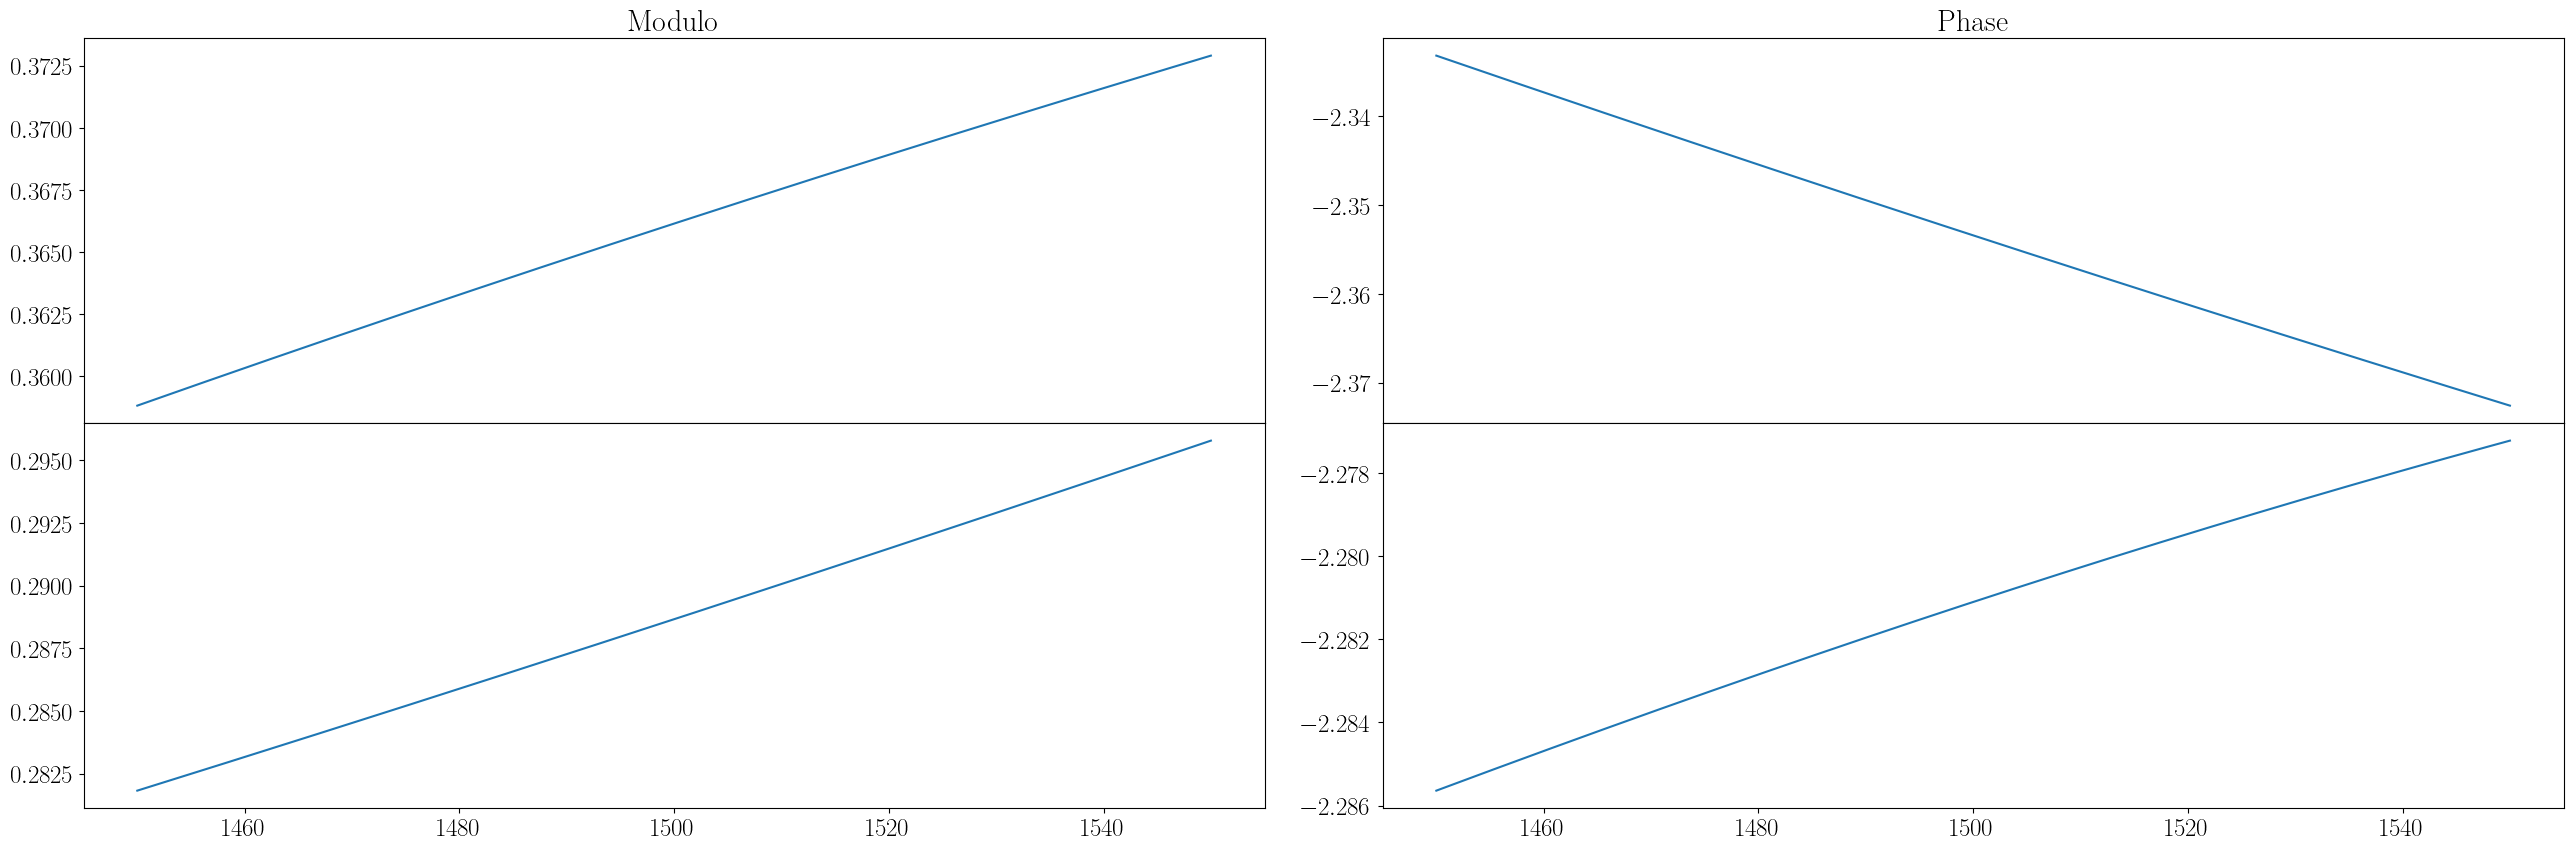

In [24]:
os.chdir("/home/rmp/Projects/TransferMatrix/Interference")


fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, gridspec_kw={'hspace':0.0, 'wspace':0.10},
                             figsize=(32, 10))

n_layers_list = [20, 40]
n_in = 1.444
n_pol = 1.6
n_out = 1.332

for i, n_layers in enumerate(n_layers_list):
    data = np.loadtxt("N{}:ni{:.3f}:np1.6:nf{:.3f}:d10.dat".format(n_layers, n_in, n_out), delimiter="\t")
    axs[i, 0].plot(data[:, 0], data[:, 1])
    axs[i, 1].plot(data[:, 0], data[:, 2])
    if i == 0:
        axs[i, 0].set_title("Modulo")
        axs[i, 1].set_title("Phase")
plt.show()